# EPSS Exploit Prediction Scoring System

A short sneak peek into EPSS version 2 from [Cyentia](https://www.cyentia.com/epss-version-2-is-out/)

In [17]:
import pandas as pd
import logging
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sb

In [3]:
logging.basicConfig(level=logging.INFO)

DAY_URL = "https://epss.cyentia.com/epss_scores-current.csv.gz"

def load_data(day_url: str = DAY_URL) -> tuple:
    try:
        logging.info('Downloading day feed')
        epss_df = pd.read_csv(day_url, compression='gzip', sep=',')
        
        if not epss_df.empty:
            logging.info(f'Done with total rows = {len(epss_df)}')
            header = epss_df.iloc[0]
            
            if len(header) == 2:
                version = header.index[0].split(':')[1]
                score_date = ''.join(header.index[1].split(':')[1:])
                epss_df.columns = header
                num_df = epss_df.iloc[1:].copy()
                num_df['epss'] = num_df['epss'].astype('float')
                num_df['percentile'] = num_df['percentile'].astype('float')
                return version, score_date, num_df
            else:
                raise Exception('EPSS format is malformed')
    except Exception as ep:
        logging.error(ep)

In [4]:
(version,score_date,epss_df) = load_data()
logging.info(f'Date = {score_date} Version = {version}')
logging.info(f'Total entries {len(epss_df)}')
logging.info(f"Total CVE {epss_df.index.nunique()}")
assert len(epss_df) == epss_df.index.nunique()

INFO:root:Downloading day feed
INFO:root:Done with total rows = 213856
INFO:root:Date = 2023-09-30T000000+0000 Version = v2023.03.01
INFO:root:Total entries 213855
INFO:root:Total CVE 213855


# Visualize the collected Data

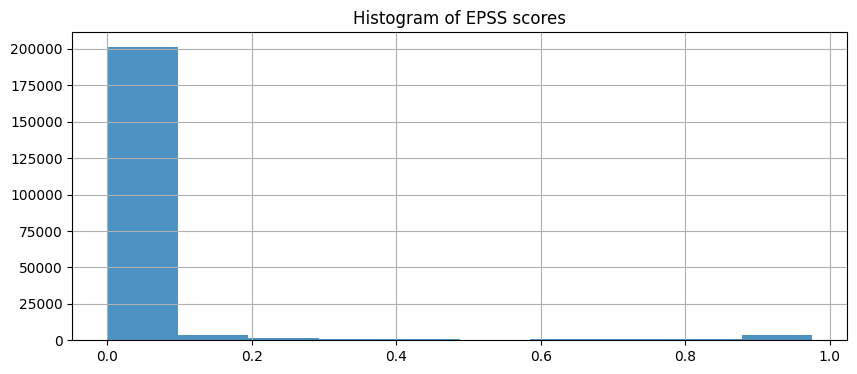

In [7]:
epss_df.hist(column='epss', alpha=0.8,figsize=(10,4))
plt.title('Histogram of EPSS scores')
plt.show()

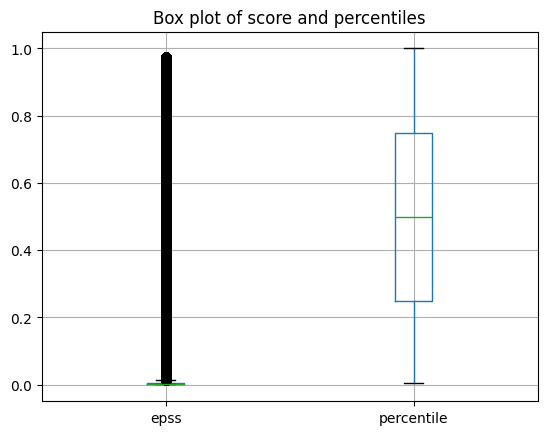

In [8]:
boxplot = epss_df.boxplot(column=['epss', 'percentile'])  
plt.title('Box plot of score and percentiles')
plt.show()

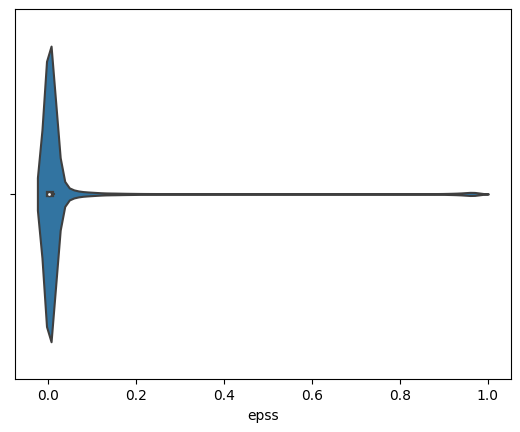

In [10]:
sb.violinplot(x = 'epss',data = epss_df)
plt.show()

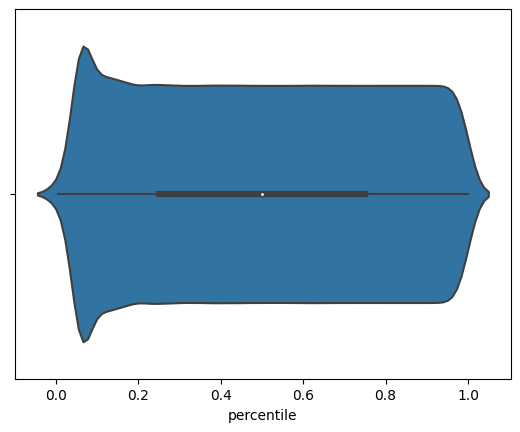

In [11]:
sb.violinplot(x = 'percentile',data = epss_df)
plt.show()

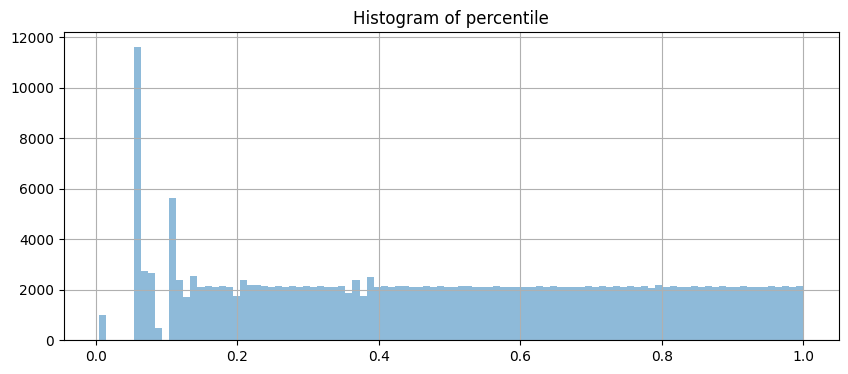

In [12]:

epss_df.hist(column='percentile',bins=100, alpha=0.5,figsize=(10,4))
plt.title('Histogram of percentile')
plt.show()

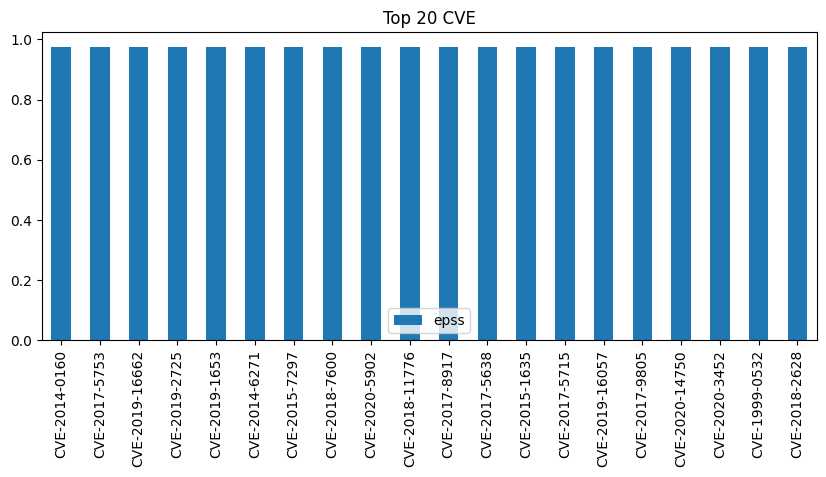

In [13]:
TOP = 20
epss_df.sort_values(by='epss',ascending=False).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Top {TOP} CVE')
plt.show()

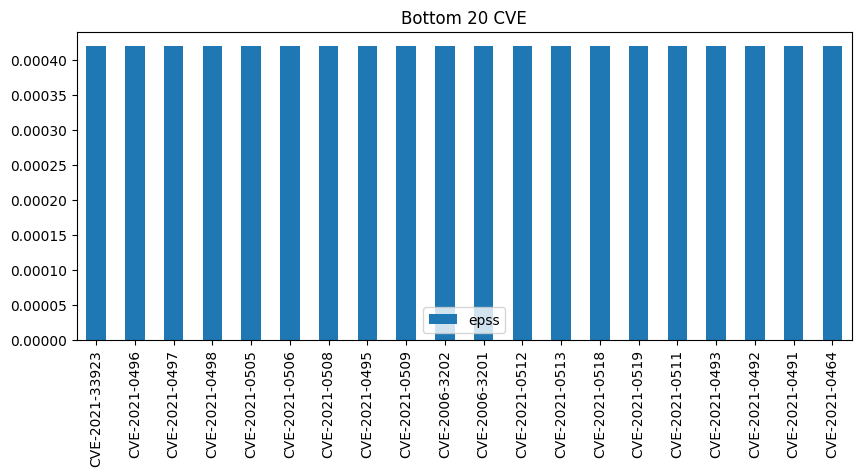

In [14]:
epss_df.sort_values(by='epss',ascending=True).head(TOP).plot.bar(y='epss',figsize=(10,4))
plt.title(f'Bottom {TOP} CVE')
plt.show()